In [1]:
!pip install arm-pyart
!pip install Cartopy
!pip install wradlib==1.0.0

     |████████████████████████████████| 10.9 MB 6.7 MB/s 
  Created wheel for arm-pyart: filename=arm_pyart-1.11.6-cp37-cp37m-linux_x86_64.whl size=10215066 sha256=b0cf0a54ead515131a7f225039ebdd15d40d9264e893c3a6c8a3b8947f539b26
  Stored in directory: /root/.cache/pip/wheels/01/db/88/9f8dbfb5bc5ce8e9704432fcb5c3340c40a8a3758a03e11b36
Successfully built arm-pyart
     |████████████████████████████████| 10.8 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 22.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 31.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 44.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |█

In [2]:
!pip list v | grep pyart

arm-pyart                     1.11.6


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import regist

In [23]:
!wget https://github.com/viniciusgcjr/my-medium/raw/6742bc5743210d014cdb0db82f421ba917695eab/radar/2017051900000100dBZ.vol

--2022-03-11 19:39:29--  https://github.com/viniciusgcjr/my-medium/raw/6742bc5743210d014cdb0db82f421ba917695eab/radar/2017051900000100dBZ.vol
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/viniciusgcjr/my-medium/6742bc5743210d014cdb0db82f421ba917695eab/radar/2017051900000100dBZ.vol [following]
--2022-03-11 19:39:29--  https://raw.githubusercontent.com/viniciusgcjr/my-medium/6742bc5743210d014cdb0db82f421ba917695eab/radar/2017051900000100dBZ.vol
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 665706 (650K) [application/octet-stream]
Saving to: ‘2017051900000100dBZ.vol’

2017051900000100dBZ 10

In [25]:
filepath = '2017051900000100dBZ.vol'
radar = pyart.aux_io.read_rainbow_wrl(filepath)

In [26]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (4680,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float64 and shape: (4680,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	reflectivity:
		data: <ndarray of type: float32 and shape: (4680, 1000)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Reflectivity
		coordinates: elevation azimuth range
		_FillValue: -9999.0
fixed_angle:
	data: <ndarray of type: float64 and shape: (13,)>
	long_name: Target an

In [27]:
radar.fields

{'reflectivity': {'_FillValue': -9999.0,
  'coordinates': 'elevation azimuth range',
  'data': masked_array(
    data=[[-25.05078125, -6.6953125, 8.1875, ..., --, --, --],
          [-20.08984375, -6.6953125, 5.2109375, ..., --, --, --],
          [--, -5.20703125, 4.71484375, ..., --, --, --],
          ...,
          [--, -12.15234375, -12.15234375, ..., --, --, --],
          [--, -5.20703125, -7.6875, ..., --, --, --],
          [--, -5.703125, -3.22265625, ..., --, --, --]],
    mask=[[False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [ True, False, False, ...,  True,  True,  True],
          ...,
          [ True, False, False, ...,  True,  True,  True],
          [ True, False, False, ...,  True,  True,  True],
          [ True, False, False, ...,  True,  True,  True]],
    fill_value=-9999.0,
    dtype=float32),
  'long_name': 'Reflectivity',
  'standard_name': 'equivalent_reflectivity_factor',
  'units': 'dBZ'}

In [28]:
radar.nsweeps

13

In [29]:
display = pyart.graph.RadarMapDisplay(radar)

# Setting projection and ploting the second tilt
projection=ccrs.PlateCarree()

#Radar Location
lon0=radar.longitude['data'][0]
lat0=radar.latitude['data'][0]

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


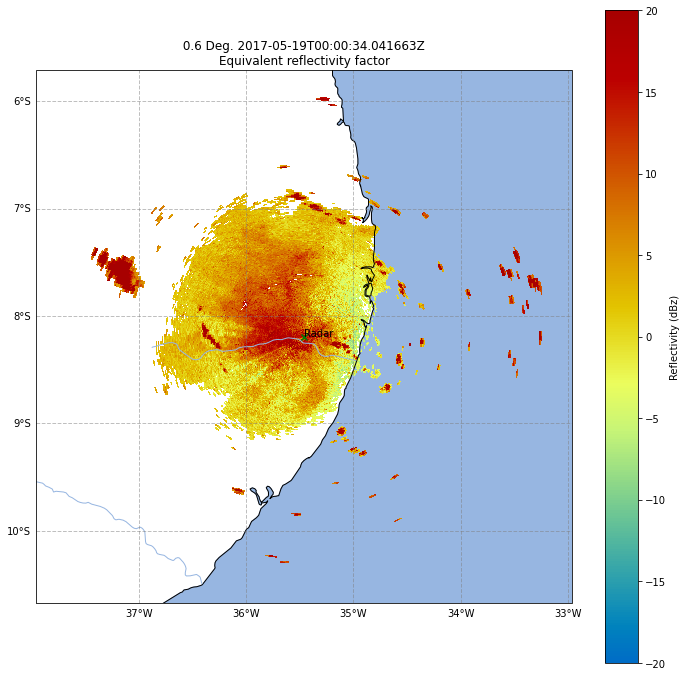

In [30]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, aspect='equal', projection=projection)
display.plot_ppi_map('reflectivity', 
                    sweep=1, 
                    vmin=-20, vmax=20,
                    #min_lon=-157.1, max_lon=-156, min_lat=71.2, max_lat=71.6, --> this argument crashes the whole system
                    #lon_lines=np.arange(-158, -154, .2),
                    #lat_lines=np.arange(69, 72, .1), 
                    #projection=projection,
                    fig=fig, 
                    lat_0=lat0,
                    lon_0=lon0,
                    colorbar_label='Reflectivity (dBz)',
                    embelish=False
                    )

# Cartopy features for geographical things to be plotted
ax.add_feature(cfeature.BORDERS) 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)

#Radar Location

ax.scatter(lon0, lat0, c='g', marker='x')
ax.text(lon0, lat0, 'Radar')

#adding gridlines to map
gridlines = ax.gridlines(crs=ccrs.PlateCarree(), 
                draw_labels=True,
                linewidth=1,
                color='gray', 
                alpha=0.5, 
                linestyle='--')
gridlines.top_labels = False
gridlines.right_labels = False